In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Assuming df is your dataset
df = pd.read_csv('D:\code\HiSCoD\db_hiscod_csv_v1_en.csv', sep=';')

C:\Users\Windows\AppData\Local\Temp\ipykernel_5108\3624181894.py:2: DtypeWarning: Columns (14,20,34,37,39,41,43,45,46,47,48,49,50,51,52,53,54,55,57,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:\code\HiSCoD\db_hiscod_csv_v1_en.csv', sep=';')


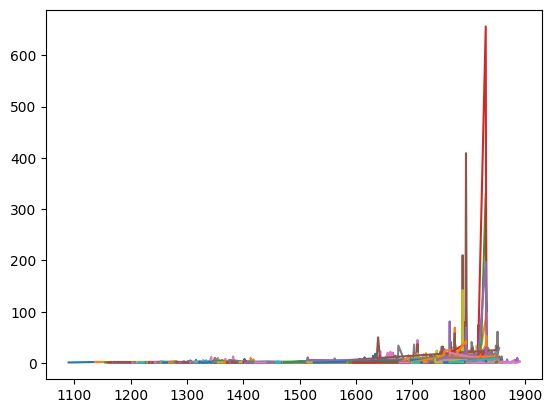

In [4]:
# Group data by year and region, and calculate the number of conflicts for each group
conflicts_by_year_region = df.groupby(['year', 'admin_level_1']).size().reset_index(name='conflict_count')

# Plot the trend of conflict counts in different regions of Europe
for region in conflicts_by_year_region['admin_level_1'].unique():
    region_data = conflicts_by_year_region[conflicts_by_year_region['admin_level_1'] == region]
    plt.plot(region_data['year'], region_data['conflict_count'], label=region)

#plt.xlabel('Year')
#plt.ylabel('Conflict Count')
#plt.title('Conflict Count Trend in Different European Regions')


# Adjust the size of the legend
#plt.legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)

#plt.show()

In [5]:
# Classify conflicts by type and calculate the number of conflicts every decade
df['decade'] = (df['year'] // 10) * 10
conflicts_by_decade_type = df.groupby(['decade', 'riot_type_hiscod']).size().reset_index(name='conflict_count')

# Find the most prominent conflict type in each decade
most_prominent_conflicts = conflicts_by_decade_type.loc[conflicts_by_decade_type.groupby('decade')['conflict_count'].idxmax()]
print(most_prominent_conflicts)

     decade      riot_type_hiscod  conflict_count
0    1090.0    Political conflict               1
1    1130.0    Religious conflict               1
2    1140.0    Political conflict               1
4    1150.0    Religious conflict               1
5    1160.0    Political conflict               2
..      ...                   ...             ...
360  1850.0  Other forms conflict             247
367  1860.0  Other forms conflict              10
371  1870.0  Other forms conflict              12
375  1880.0  Other forms conflict              29
378  1890.0  Other forms conflict               3

[73 rows x 3 columns]


In [6]:
conflicts_by_decade = df.groupby(['decade']).size().reset_index(name='conflict_count')
conflicts_by_decade

,decade,conflict_count
0,1090.0,1
1,1130.0,1
2,1140.0,2
3,1150.0,1
4,1160.0,2
...,...,...
72,1850.0,558
73,1860.0,27
74,1870.0,33
75,1880.0,48


In [7]:
conflicts_by_decade.to_csv('conflicts_by_decade.csv', sep=',', index=False, encoding='utf-8')

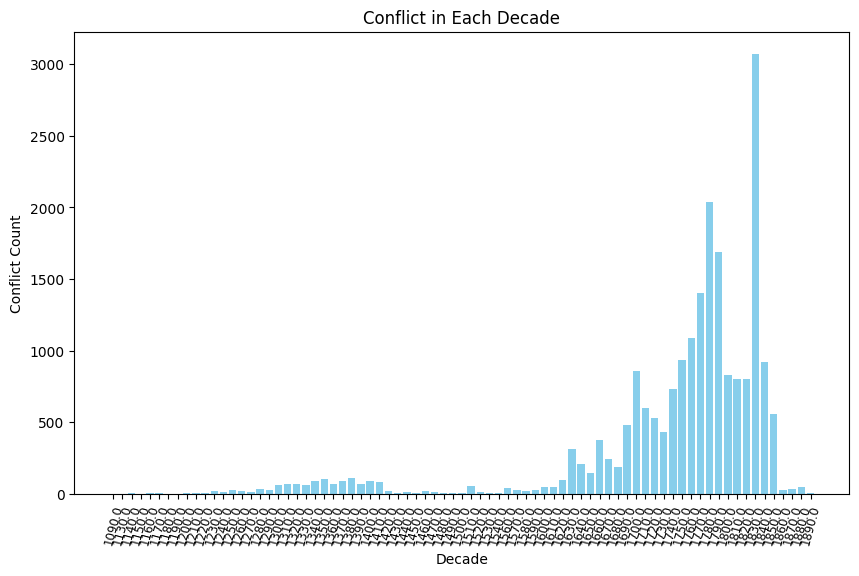

In [8]:
# Plot a bar chart of the most prominent conflict type in each decade
plt.figure(figsize=(10, 6))
plt.bar(conflicts_by_decade['decade'].astype(str), conflicts_by_decade['conflict_count'], color='skyblue')
plt.xlabel('Decade')
plt.ylabel('Conflict Count')

# Adjust the size of the x-axis tick labels
plt.xticks(fontsize='small', rotation=75)
plt.title('Conflict in Each Decade')
plt.show()



In [9]:
conflicts_by_decade

,decade,conflict_count
0,1090.0,1
1,1130.0,1
2,1140.0,2
3,1150.0,1
4,1160.0,2
...,...,...
72,1850.0,558
73,1860.0,27
74,1870.0,33
75,1880.0,48


In [10]:
# Classify conflicts by type and calculate the number of conflicts every decade
df['decade'] = (df['year'] // 10) * 10
conflicts_by_decade_type = df.groupby(['decade', 'riot_type_hiscod']).size().reset_index(name='conflict_count')

# Find the most prominent conflict type in each decade
most_prominent_conflicts = conflicts_by_decade_type.loc[conflicts_by_decade_type.groupby('decade')['conflict_count'].idxmax()]
print(most_prominent_conflicts)

     decade      riot_type_hiscod  conflict_count
0    1090.0    Political conflict               1
1    1130.0    Religious conflict               1
2    1140.0    Political conflict               1
4    1150.0    Religious conflict               1
5    1160.0    Political conflict               2
..      ...                   ...             ...
360  1850.0  Other forms conflict             247
367  1860.0  Other forms conflict              10
371  1870.0  Other forms conflict              12
375  1880.0  Other forms conflict              29
378  1890.0  Other forms conflict               3

[73 rows x 3 columns]


In [11]:
conflicts_by_decade = df.groupby(['decade']).size().reset_index(name='conflict_count')
conflicts_by_decade

,decade,conflict_count
0,1090.0,1
1,1130.0,1
2,1140.0,2
3,1150.0,1
4,1160.0,2
...,...,...
72,1850.0,558
73,1860.0,27
74,1870.0,33
75,1880.0,48


In [12]:
print(df['year'])

0        1789.0
1        1789.0
2        1789.0
3        1789.0
4        1789.0
          ...  
20946    1789.0
20947    1789.0
20948    1789.0
20949    1585.0
20950    1436.0
Name: year, Length: 20951, dtype: float64


In [13]:
conflicts_by_year =  df.groupby(['year']).size().reset_index(name='conflict_count')
conflicts_by_year

,year,conflict_count
0,1090.0,1
1,1137.0,1
2,1142.0,2
3,1155.0,1
4,1160.0,1
...,...,...
576,1886.0,11
577,1887.0,4
578,1888.0,4
579,1889.0,5


In [14]:
conflicts_by_year.to_csv('conflicts_by_year.csv', sep=',', index=False, encoding='utf-8')

In [15]:
conflicts_by_year_np = conflicts_by_year.to_numpy().astype(int)

In [16]:
conflicts_timestamp = []
for year in conflicts_by_year_np:
    conflicts_timestamp.append(np.linspace(year[0],year[0]+1,year[1]+2)[1:-1])


conflicts_timestamp = np.concatenate(conflicts_timestamp)
print(conflicts_timestamp)


[1090.5        1137.5        1142.33333333 ... 1890.5        1890.66666667
 1890.83333333]


In [17]:
conflicts_timestamp.shape

(20950,)

In [18]:
!pip install hawkes
import Hawkes as hk

In [19]:
model = hk.estimator()
model.set_kernel('pow')
model.set_baseline('const')

In [20]:
conflicts_timestamp_1k = conflicts_timestamp - 1000
conflicts_timestamp_1k.shape

(20950,)

In [ ]:
itv = [0,1000] # the observation interval
model.fit(conflicts_timestamp_1k,itv) # T is the event times (numpy.ndarray)
print("parameter:",model.parameter) # the estimated parameter values
print("branching ratio:",model.br) # the branching ratio
print("log-likelihood:",model.L) # the log-likelihood of the estimated parameter values
print("AIC:",model.AIC) # the AIC of the estimated parameter values

In [269]:
best_mu = 0.5197
best_k = 2.8339
best_p = 3.3858
best_c = 1.1140

In [275]:
simulation = hk.simulator()
simulation.set_kernel('pow')
simulation.set_baseline('const')
para = {'mu':best_mu, 'k':best_k, 'p':best_p, 'c':best_c}
simulation.set_parameter(para)

In [278]:
itv_simu = [890,1000] # the observation interval
result = simulation.simulate(itv_simu)

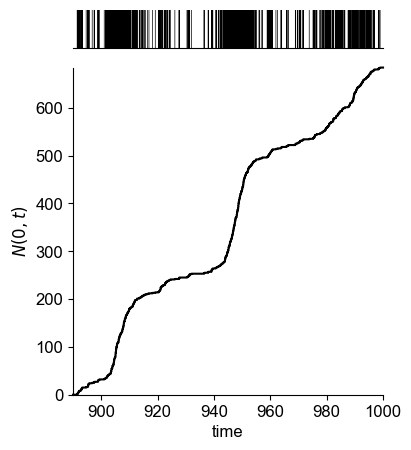

In [279]:
simulation.plot_N()

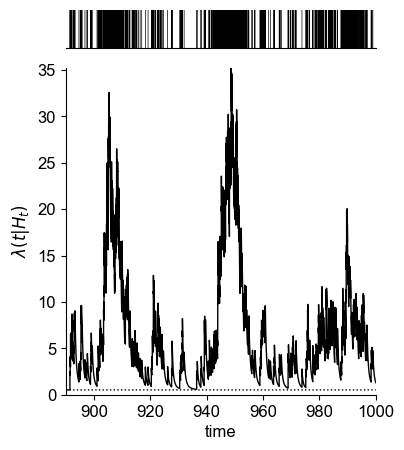

In [280]:
simulation.plot_l()

In [112]:
model2 = hk.estimator()
model2.set_kernel('pow')
model2.set_baseline('const')

In [113]:
itv = [0,600] # the observation interval
model2.fit(conflicts_timestamp_1k,itv) # T is the event times (numpy.ndarray)
print("parameter:",model2.parameter) # the estimated parameter values
print("branching ratio:",model2.br) # the branching ratio
print("log-likelihood:",model2.L) # the log-likelihood of the estimated parameter values
print("AIC:",model2.AIC) # the AIC of the estimated parameter values

parameter: {'mu': 0.04595183168843432, 'k': 2.1890622543360356, 'p': 2.2876709972336564, 'c': 1.5234049084836083}
branching ratio: 0.9886604787336435
log-likelihood: 883.3719366775613
AIC: -1758.7438733551226


In [114]:
model3 = hk.estimator()
model3.set_kernel('pow')
model3.set_baseline('const')

In [115]:
itv = [0,700] # the observation interval
model3.fit(conflicts_timestamp_1k,itv) # T is the event times (numpy.ndarray)
print("parameter:",model3.parameter) # the estimated parameter values
print("branching ratio:",model3.br) # the branching ratio
print("log-likelihood:",model3.L) # the log-likelihood of the estimated parameter values
print("AIC:",model3.AIC) # the AIC of the estimated parameter values

parameter: {'mu': 0.06506088030026713, 'k': 2.777734810486532, 'p': 2.571434229583173, 'c': 1.4239175208956145}
branching ratio: 1.0143860095797363
log-likelihood: 5803.090745654583
AIC: -11598.181491309166


In [ ]:
model4 = hk.estimator()
model4.set_kernel('exp')
model4.set_baseline('const',)

itv = [0,1000] # the observation interval
model4.fit(conflicts_timestamp_1k,itv) # T is the event times (numpy.ndarray)
print("parameter:",model4.parameter) # the estimated parameter values
print("branching ratio:",model4.br) # the branching ratio
print("log-likelihood:",model4.L) # the log-likelihood of the estimated parameter values
print("AIC:",model4.AIC) # the AIC of the estimated parameter values

parameter: {'mu': 0.26702545279571765, 'alpha': 0.9872541553091945, 'beta': 3.7410842762563994}
branching ratio: 0.9872541553091945
log-likelihood: 76188.93828021841
AIC: -152371.87656043682


In [1]:
model4 = hk.estimator()
model4.set_kernel('exp')
model4.set_baseline('pconst',num_basis=10)

itv = [0,1000] # the observation interval
model4.fit(conflicts_timestamp_1k,itv) # T is the event times (numpy.ndarray)
print("parameter:",model4.parameter) # the estimated parameter values
print("branching ratio:",model4.br) # the branching ratio
print("log-likelihood:",model4.L) # the log-likelihood of the estimated parameter values
print("AIC:",model4.AIC) # the AIC of the estimated parameter values

NameError: name 'hk' is not defined

In [127]:
model5 = hk.estimator()
model5.set_kernel('exp')
model5.set_baseline('const')

itv = [500,600] # the observation interval
model5.fit(conflicts_timestamp_1k,itv) # T is the event times (numpy.ndarray)
print("parameter:",model5.parameter) # the estimated parameter values
print("branching ratio:",model5.br) # the branching ratio
print("log-likelihood:",model5.L) # the log-likelihood of the estimated parameter values
print("AIC:",model5.AIC) # the AIC of the estimated parameter values

parameter: {'mu': 0.4214598377779751, 'alpha': 0.7847054246441476, 'beta': 2.5731149631146146}
branching ratio: 0.7847054246441476
log-likelihood: 61.94169246592989
AIC: -117.88338493185978


In [128]:
model6 = hk.estimator()
model6.set_kernel('exp')
model6.set_baseline('const')

itv = [600,700] # the observation interval
model6.fit(conflicts_timestamp_1k,itv) # T is the event times (numpy.ndarray)
print("parameter:",model6.parameter) # the estimated parameter values
print("branching ratio:",model6.br) # the branching ratio
print("log-likelihood:",model6.L) # the log-likelihood of the estimated parameter values
print("AIC:",model6.AIC) # the AIC of the estimated parameter values

parameter: {'mu': 1.795582545790533, 'alpha': 0.9277069205957335, 'beta': 1.8325153611875762}
branching ratio: 0.9277069205957335
log-likelihood: 4945.848875332149
AIC: -9885.697750664298


In [129]:
model7 = hk.estimator()
model7.set_kernel('exp')
model7.set_baseline('const')

itv = [700,800] # the observation interval
model7.fit(conflicts_timestamp_1k,itv) # T is the event times (numpy.ndarray)
print("parameter:",model7.parameter) # the estimated parameter values
print("branching ratio:",model7.br) # the branching ratio
print("log-likelihood:",model7.L) # the log-likelihood of the estimated parameter values
print("AIC:",model7.AIC) # the AIC of the estimated parameter values

parameter: {'mu': 5.773358546078309, 'alpha': 0.9439767554702487, 'beta': 6.330580993736603}
branching ratio: 0.9439767554702487
log-likelihood: 40533.522400991795
AIC: -81061.04480198359


In [130]:
model8 = hk.estimator()
model8.set_kernel('exp')
model8.set_baseline('const')

itv = [800,900] # the observation interval
model8.fit(conflicts_timestamp_1k,itv) # T is the event times (numpy.ndarray)
print("parameter:",model8.parameter) # the estimated parameter values
print("branching ratio:",model8.br) # the branching ratio
print("log-likelihood:",model8.L) # the log-likelihood of the estimated parameter values
print("AIC:",model8.AIC) # the AIC of the estimated parameter values

parameter: {'mu': 1.1849251144021122, 'alpha': 0.9833109142748021, 'beta': 5.925032782944032}
branching ratio: 0.9833109142748021
log-likelihood: 30243.18888182632
AIC: -60480.37776365264


In [69]:
timestamp_5to6 = []
timestamp_6to7 = []
timestamp_7to8 = []
timestamp_8to9 = []

for i in conflicts_timestamp_1k:
    if i > 500 and i < 600:
        timestamp_5to6.append(i)
    if i > 600 and i < 700:
        timestamp_6to7.append(i)
    if i > 700 and i < 800:
        timestamp_7to8.append(i)
    if i > 800 and i < 900:
        timestamp_8to9.append(i)



In [72]:
timestamp_5to6 = np.array(timestamp_5to6)
timestamp_6to7 = np.array(timestamp_6to7)
timestamp_7to8 = np.array(timestamp_7to8)
timestamp_8to9 = np.array(timestamp_8to9)

In [75]:
timestamp_100_5to6 = timestamp_5to6 - 500
timestamp_100_6to7 = timestamp_6to7 - 600
timestamp_100_7to8 = timestamp_7to8 - 700
timestamp_100_8to9 = timestamp_8to9 - 800


In [87]:
timestamp_100_5to6 = timestamp_100_5to6*10

In [95]:
timestamp_100_5to6.shape


(192,)

In [100]:
sample =  np.random.choice(timestamp_100_5to6, size=100, replace=False)
sample = np.sort(sample)
sample

array([ 21.66666667,  25.        ,  26.66666667,  28.33333333,
       115.        , 124.        , 131.30434783, 131.73913043,
       132.17391304, 133.04347826, 133.47826087, 134.34782609,
       134.7826087 , 135.2173913 , 135.65217391, 136.08695652,
       136.95652174, 137.39130435, 137.82608696, 138.69565217,
       139.13043478, 142.10526316, 142.63157895, 144.21052632,
       144.73684211, 145.26315789, 147.36842105, 148.42105263,
       148.94736842, 151.66666667, 153.33333333, 158.33333333,
       175.        , 177.5       , 192.5       , 195.        ,
       223.33333333, 226.66666667, 235.        , 241.66666667,
       245.        , 248.33333333, 255.        , 295.        ,
       375.        , 406.66666667, 611.42857143, 614.28571429,
       617.14285714, 620.43478261, 620.86956522, 621.30434783,
       623.47826087, 623.91304348, 625.65217391, 626.08695652,
       626.52173913, 628.69565217, 629.13043478, 665.        ,
       671.42857143, 672.85714286, 674.28571429, 682.5 

In [101]:
model2 = hk.estimator()
model2.set_kernel('pow')
model2.set_baseline('const')

itv = [0,1000] # the observation interval
model2.fit(sample,itv) # T is the event times (numpy.ndarray)
print("parameter:",model2.parameter) # the estimated parameter values
print("branching ratio:",model2.br) # the branching ratio
print("log-likelihood:",model2.L) # the log-likelihood of the estimated parameter values
print("AIC:",model2.AIC) # the AIC of the estimated parameter values

C:\Users\Windows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\Hawkes\tools\Quasi_Newton.py:143: RuntimeWarning: overflow encountered in multiply
  para[param.idx("para_exp")] *= np.exp( s_extended[param.idx("para_exp")] )
C:\Users\Windows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\Hawkes\model.py:790: RuntimeWarning: invalid value encountered in multiply
  H   = delta * k * np.exp( log_dphi + (p-1)*log_phi - c*phi ) / gamma(p)
C:\Users\Windows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\Hawkes\model.py:800: RuntimeWarning: invalid value encountered in multiply
  H_p = delta * k * np.exp( log_dphi + (p-1)*log_phi - c*phi ) / gamma(p) * (log_phi-digamma(p))
C:\Users\Windows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\Local

KeyboardInterrupt: 

In [ ]:
timestamp_100_5to6

In [9]:
# Convert the year to decade and century intervals
df['decade'] = (df['year'] // 10) * 10
df['century'] = (df['year'] // 100) * 100

# Classify conflicts by type and calculate the number of conflicts every decade and every century
conflicts_by_decade_type = df.groupby(['decade', 'riot_type_hiscod']).size().reset_index(name='conflict_count')
conflicts_by_century_type = df.groupby(['century', 'riot_type_hiscod']).size().reset_index(name='conflict_count')

# Find the most prominent conflict type in each decade and each century
most_prominent_conflicts_decade = conflicts_by_decade_type.loc[conflicts_by_decade_type.groupby('decade')['conflict_count'].idxmax()]
most_prominent_conflicts_century = conflicts_by_century_type.loc[conflicts_by_century_type.groupby('century')['conflict_count'].idxmax()]

# Output the results
print('Most prominent conflict type in each decade:')
print(most_prominent_conflicts_decade)
print('\nMost prominent conflict type in each century:')
print(most_prominent_conflicts_century)



Most prominent conflict type in each decade:
     decade      riot_type_hiscod  conflict_count
0    1090.0    Political conflict               1
1    1130.0    Religious conflict               1
2    1140.0    Political conflict               1
4    1150.0    Religious conflict               1
5    1160.0    Political conflict               2
..      ...                   ...             ...
360  1850.0  Other forms conflict             247
367  1860.0  Other forms conflict              10
371  1870.0  Other forms conflict              12
375  1880.0  Other forms conflict              29
378  1890.0  Other forms conflict               3

[73 rows x 3 columns]

Most prominent conflict type in each century:
    century                                 riot_type_hiscod  conflict_count
0    1000.0                               Political conflict               1
2    1100.0                               Political conflict               4
9    1200.0                               Political co


All types of conflicts:
['Tax riot' 'Feudal conflict' 'Food riot' 'Labour conflict'
 'Conflict with local and/or national authorities' 'Other forms conflict'
 'Religious conflict' 'Political conflict' nan 'Slave revolt']


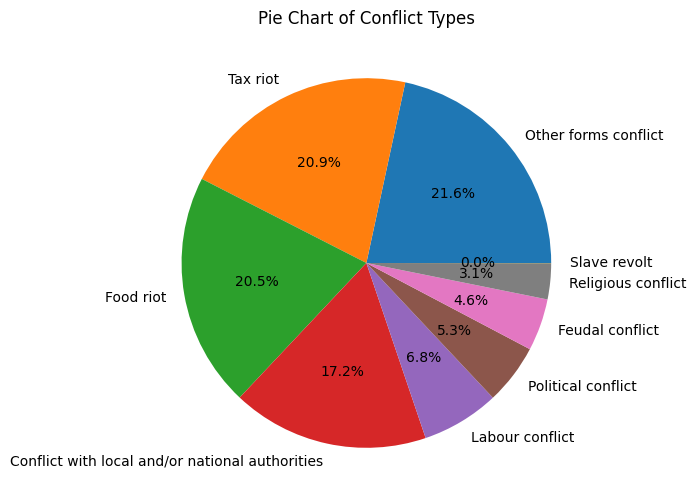

In [10]:
# Output all types of conflicts
print('\nAll types of conflicts:')
print(df['riot_type_hiscod'].unique())

conflicts_by_type = df['riot_type_hiscod'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(conflicts_by_type.values, labels=conflicts_by_type.index, autopct='%1.1f%%')
plt.title('Pie Chart of Conflict Types')
plt.show()